In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import face_recognition
import keras

In [2]:
model = load_model("model_testV3.h5")

In [3]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

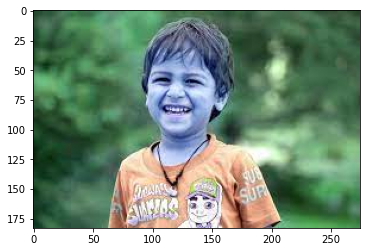

In [4]:
face_image  = cv2.imread('1.jpg')        
plt.imshow(face_image)

In [5]:
face_image.shape

(183, 275, 3)

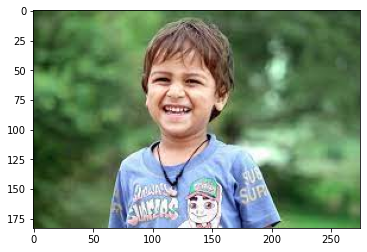

In [6]:
plt.imshow(cv2.cvtColor(face_image,cv2.COLOR_BGR2RGB))

In [7]:
gray = cv2.cvtColor(face_image,cv2.COLOR_BGR2GRAY)
    
faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x, y, w, h) in faces:
    cv2.rectangle(face_image,(x, y), (x+w, y+h), (0, 0, 255), 2)

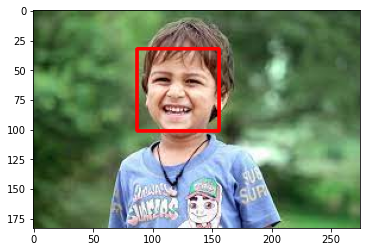

In [8]:
plt.imshow(cv2.cvtColor(face_image,cv2.COLOR_BGR2RGB))

In [9]:
face_image.shape

(183, 275, 3)

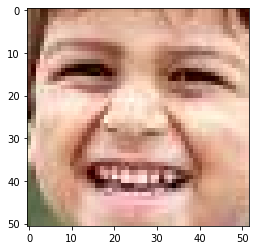

In [10]:
 face_locations = face_recognition.face_locations(face_image)
 top, right, bottom, left = face_locations[0]
 face_image = face_image[top:bottom, left:right]
 #plt.imshow(face_image)
plt.imshow(cv2.cvtColor(face_image,cv2.COLOR_BGR2RGB))

In [11]:
face_image.shape

(51, 52, 3)

In [12]:
# resizing the image
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [13]:
face_image.shape

(1, 48, 48, 1)

In [14]:
predicted_class = np.argmax(model.predict(face_image))

In [15]:
print(predicted_class)

3


In [16]:
emotion_labels= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

In [17]:
label_map = dict((v,k) for k,v in emotion_labels.items()) 
predicted_label = label_map[predicted_class]

In [18]:
print("The fecial emotion is",'\033[1m' + predicted_label)

The fecial emotion is Happy
